<a href="https://colab.research.google.com/github/ramzesssina/ML---labi/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Анализ целевой переменной Y с точки зрения статистики**

In [101]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("/content/nba.csv")

In [ ]:
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [ ]:
for column in df.columns:
  print(f"колонка:{column}")

колонка:Name
колонка:GP
колонка:MIN
колонка:PTS
колонка:FGM
колонка:FGA
колонка:FG%
колонка:3P Made
колонка:3PA
колонка:3P%
колонка:FTM
колонка:FTA
колонка:FT%
колонка:OREB
колонка:DREB
колонка:REB
колонка:AST
колонка:STL
колонка:BLK
колонка:TOV
колонка:TARGET_5Yrs


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

# **Проверьте наличие пропущенных значений и работа с пропусками для числовых**

In [ ]:
print(df.isnull().sum())

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [ ]:
np.random.seed(20)
df_test = df.copy()
df_test = df_test.rename(columns={'3P%' : 'ProsentTRESHEK'}) # переименовал стобец, из-за ошибки
df_test.loc[np.random.choice(df_test.index, size=5, replace=True), 'ProsentTRESHEK'] = np.nan

In [ ]:
print(df_test.isnull().sum())

Name               0
GP                 0
MIN                0
PTS                0
FGM                0
FGA                0
FG%                0
3P Made            0
3PA                0
ProsentTRESHEK    16
FTM                0
FTA                0
FT%                0
OREB               0
DREB               0
REB                0
AST                0
STL                0
BLK                0
TOV                0
TARGET_5Yrs        0
dtype: int64


In [ ]:
# Вариант 1 : удаление строк с пропусками
df_drop = df_test.dropna()
print("Удаление строк с пропусками \n")
print(df_drop.isnull().sum())

Удаление строк с пропусками 

Name              0
GP                0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made           0
3PA               0
ProsentTRESHEK    0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs       0
dtype: int64


In [ ]:
# Вариант 2: заполнение строк медианой
df_median = df_test.copy()
df_median.ProsentTRESHEK= df_median.ProsentTRESHEK.fillna(df_median.ProsentTRESHEK.median())

print("Заполнение пустых строк медианой \n")
print(df_median.isnull().sum())

Заполнение пустых строк медианой 

Name              0
GP                0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made           0
3PA               0
ProsentTRESHEK    0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs       0
dtype: int64


In [ ]:
# Вариант 3: заполнение пропусков средним
df_mean = df_test.copy()
df_mean.ProsentTRESHEK = df_mean.ProsentTRESHEK.fillna(df_mean.ProsentTRESHEK.mean())

print("Заполнение пустых строк средним \n")
print(df_mean.isnull().sum())

Заполнение пустых строк средним 

Name              0
GP                0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made           0
3PA               0
ProsentTRESHEK    0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs       0
dtype: int64


In [ ]:
# Вариант 4 : Заполнение строк модом
df_mode = df_test.copy()
df_mode.ProsentTRESHEK = df_mode.ProsentTRESHEK.fillna(df_mode.ProsentTRESHEK.mode()[0])

print("Заполнение пустых строк модом \n")
print(df_mode.isnull().sum())

Заполнение пустых строк модом 

Name              0
GP                0
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made           0
3PA               0
ProsentTRESHEK    0
FTM               0
FTA               0
FT%               0
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs       0
dtype: int64


# Выбираем целевую **переменную**

In [ ]:
# Если процент результативных бросков больше 50% то 1 иначе 0
df["max_min_on_fg"] = np.where(df["FG%"] >= 50, 1, 0).astype(int)

In [ ]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs', 'max_min_on_fg'],
      dtype='object')

In [ ]:
Y = df["max_min_on_fg"]
X = df.drop("max_min_on_fg", axis=1)

X = X.drop("FG%", axis = 1)

# **Графический анализ**

In [ ]:
numeric_cols = X.select_dtypes(include=["float64", "int64"])
numeric_cols

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,68,12.6,3.9,1.5,4.1,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,43,12.1,5.4,2.2,3.9,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,52,12.0,4.5,1.7,3.8,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


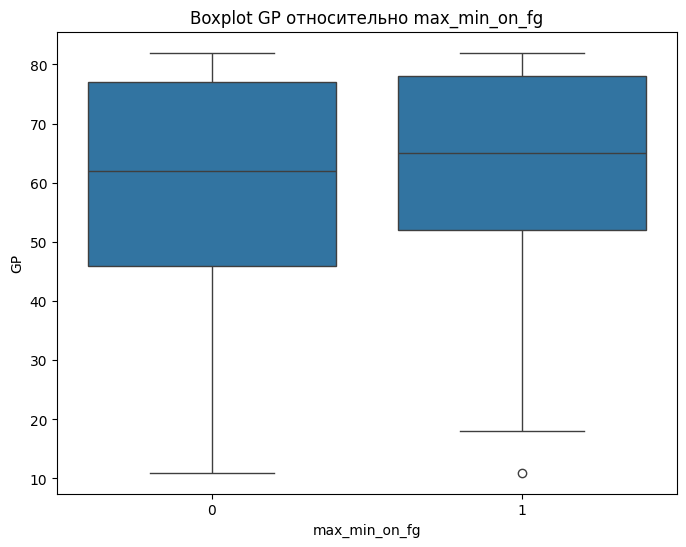

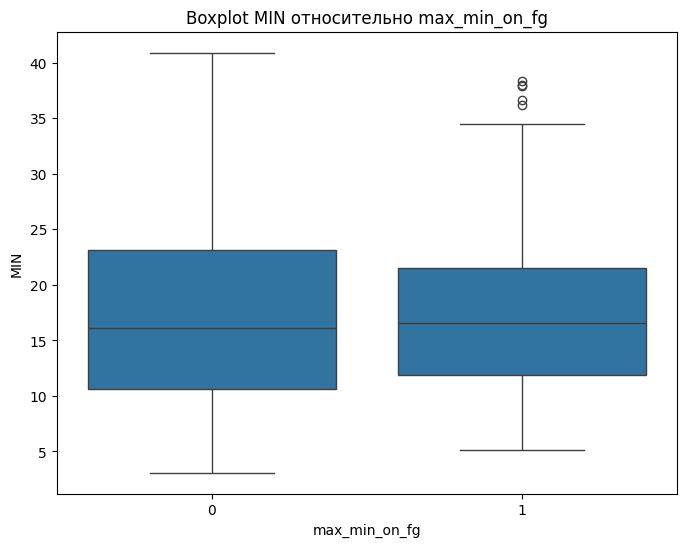

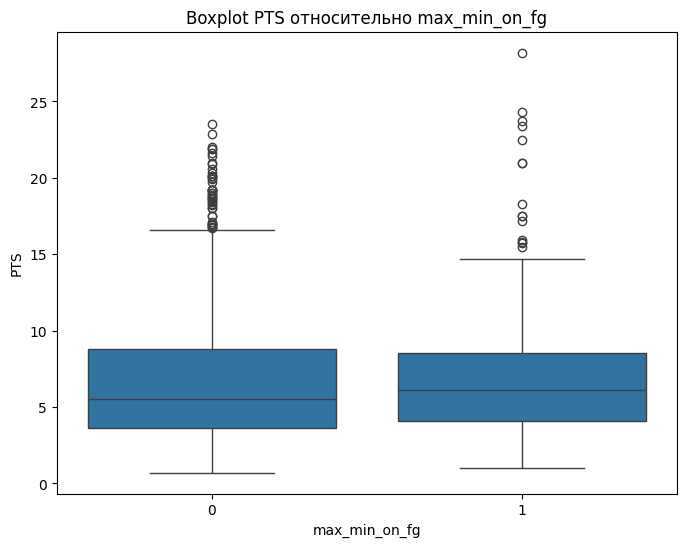

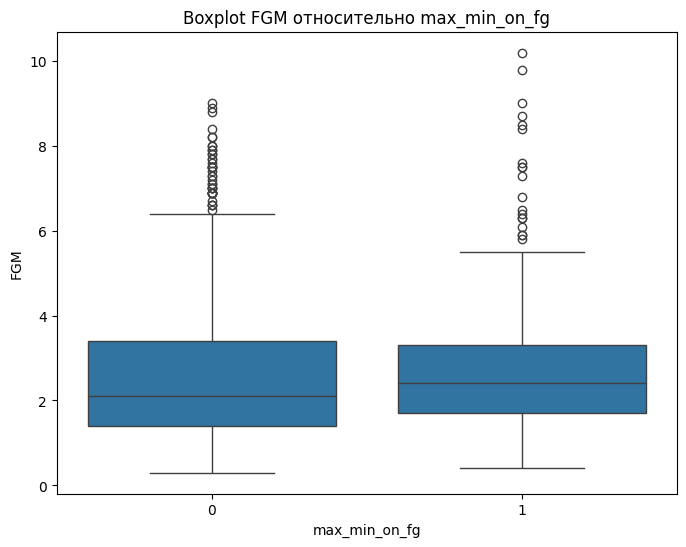

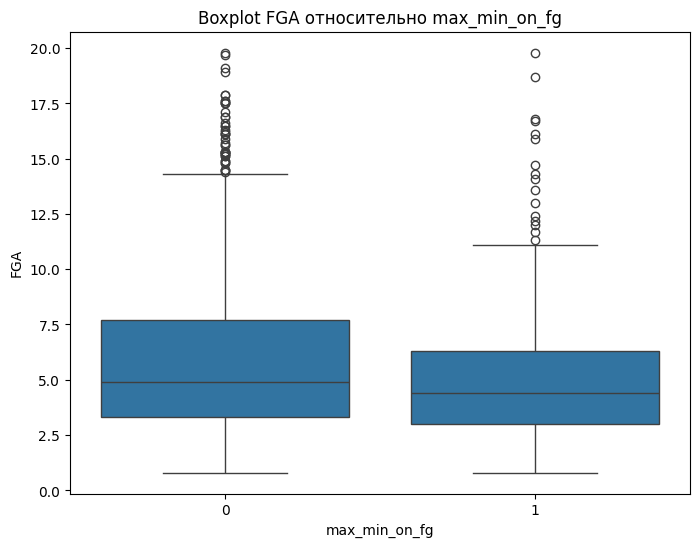

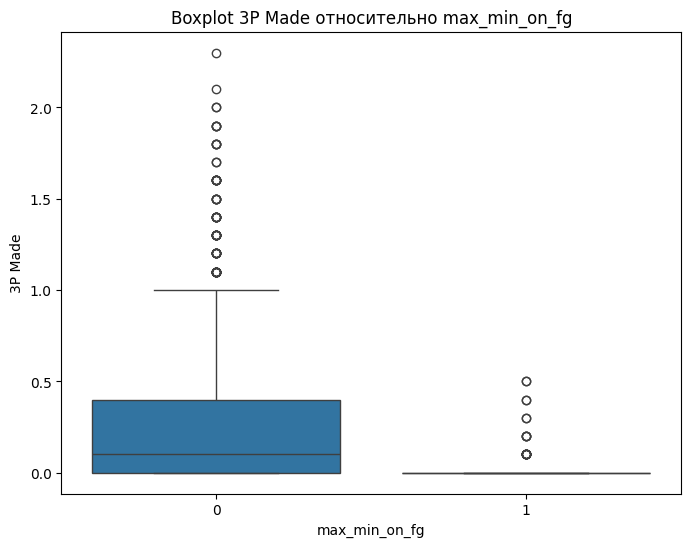

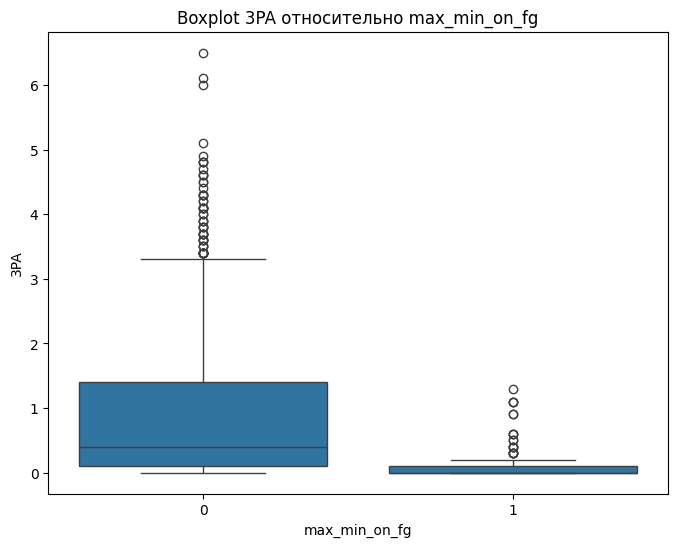

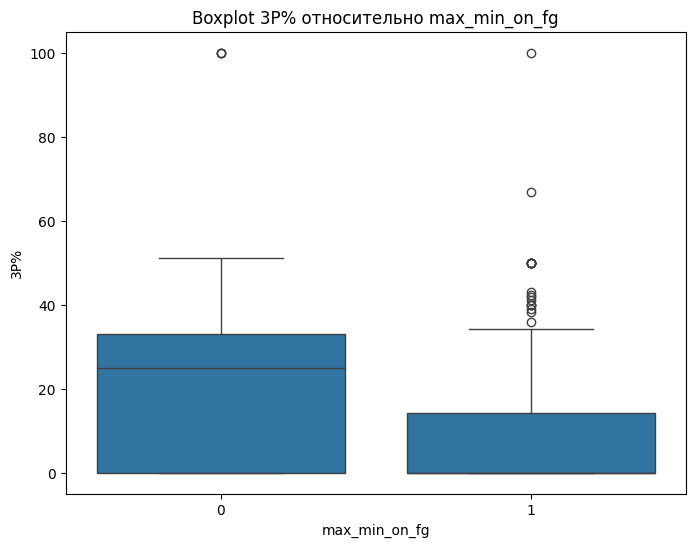

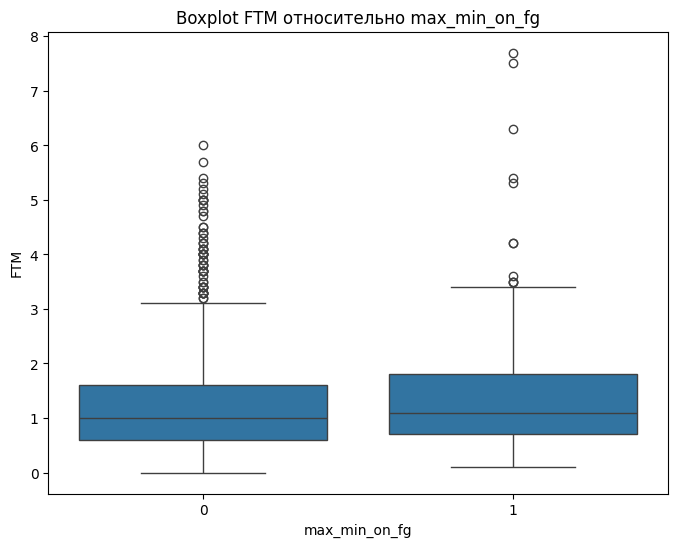

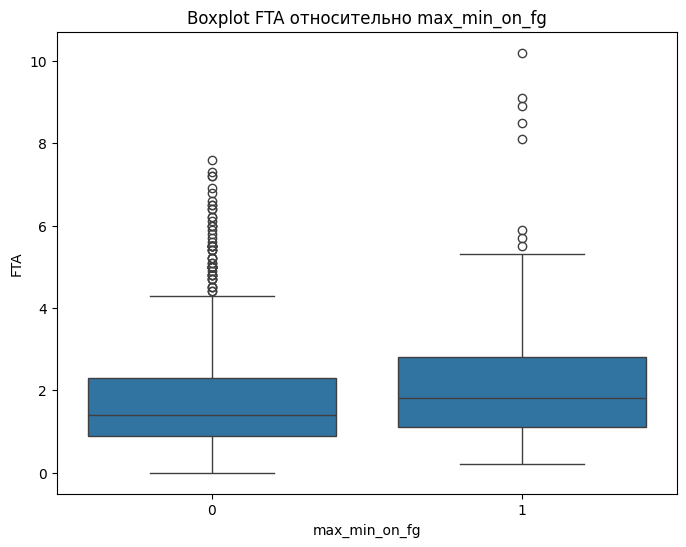

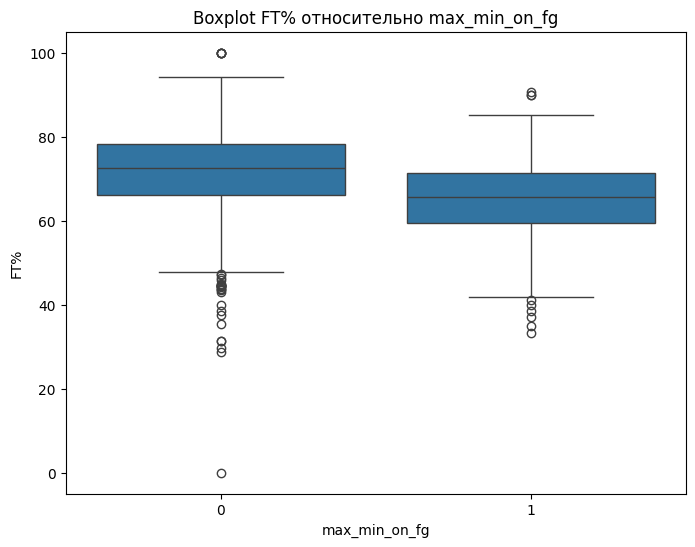

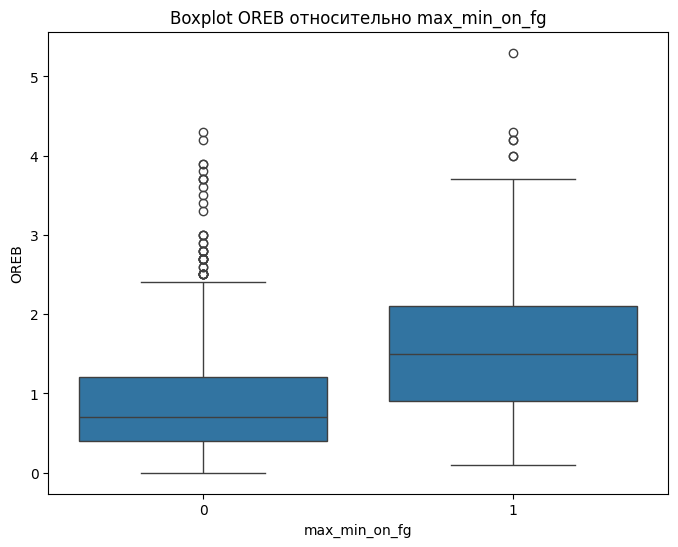

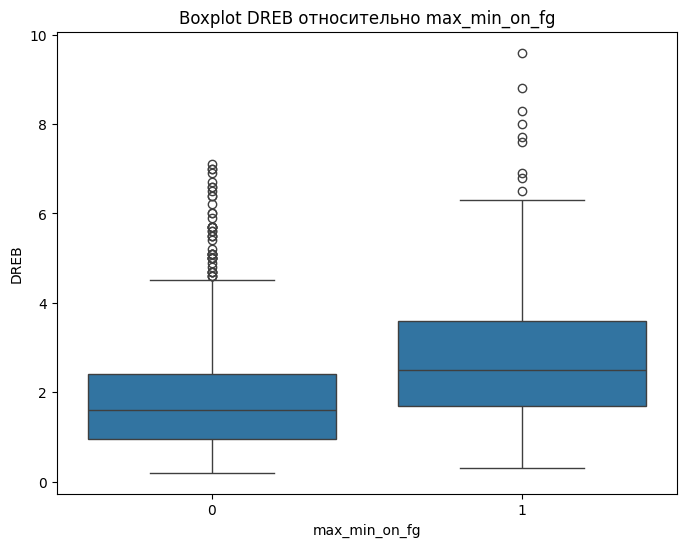

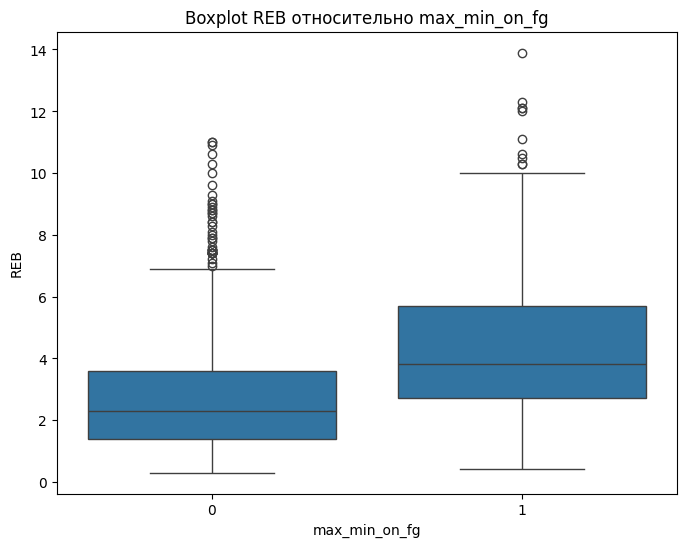

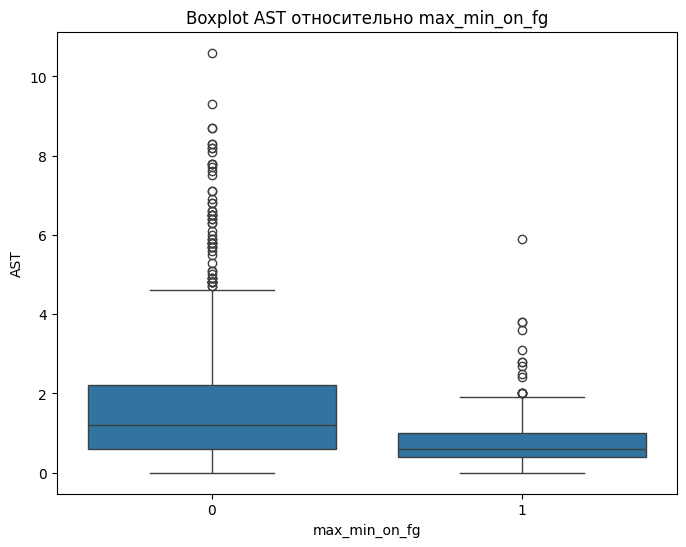

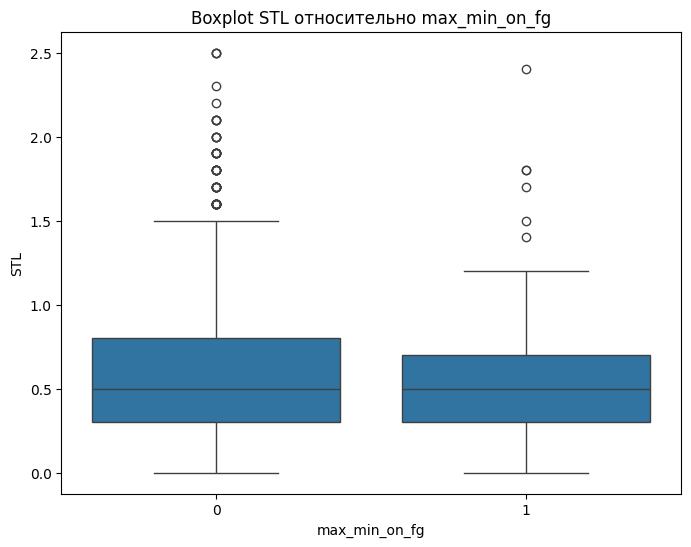

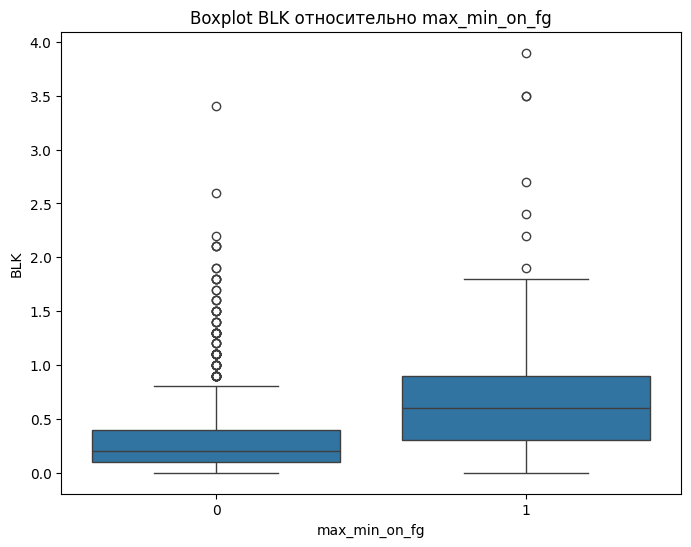

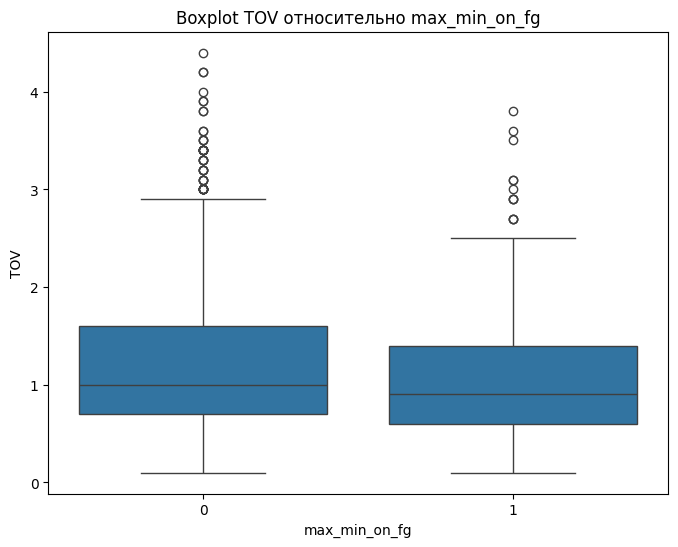

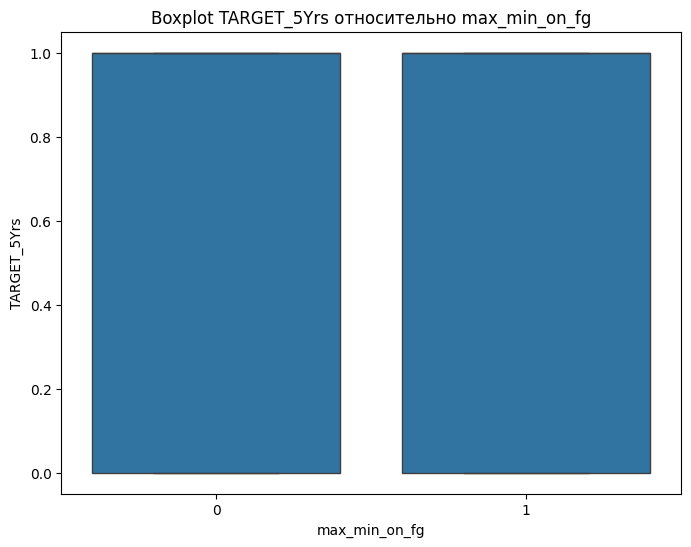

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(x="max_min_on_fg", y=col, data=df)
  plt.title(f"Boxplot {col} относительно max_min_on_fg")
  plt.show()

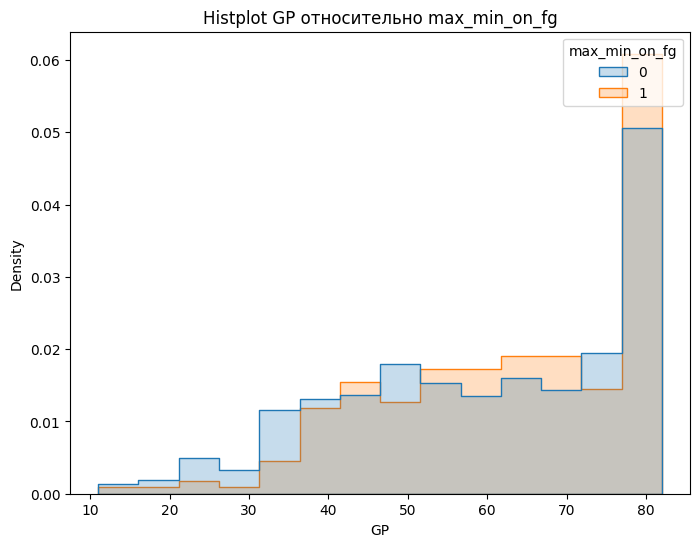

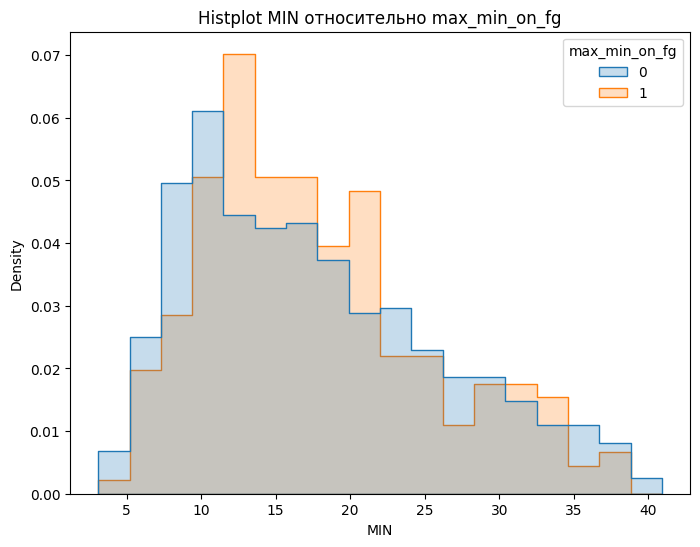

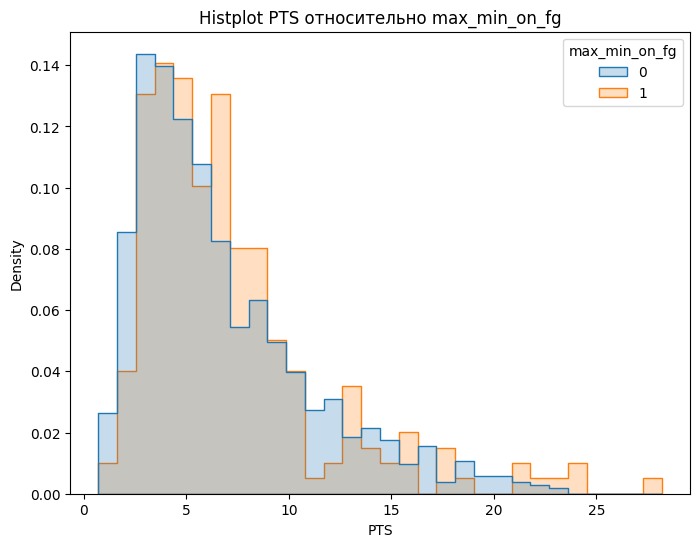

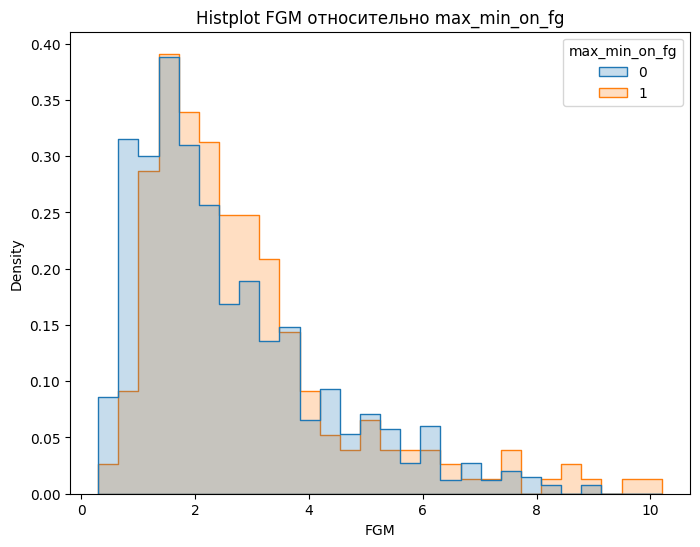

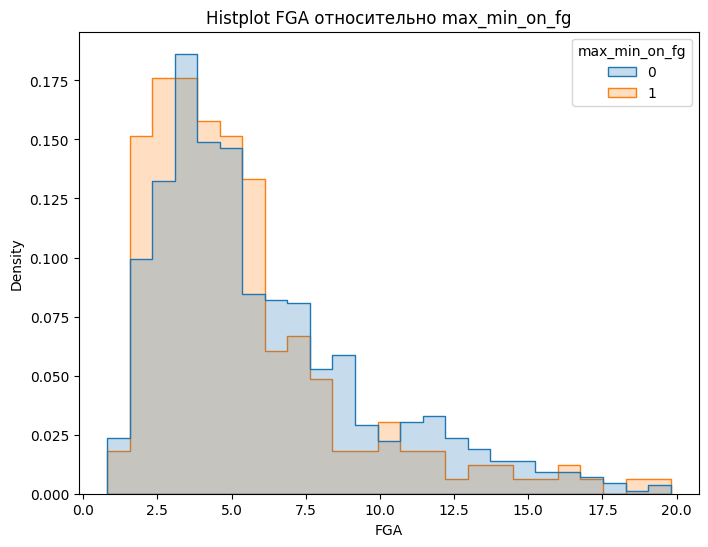

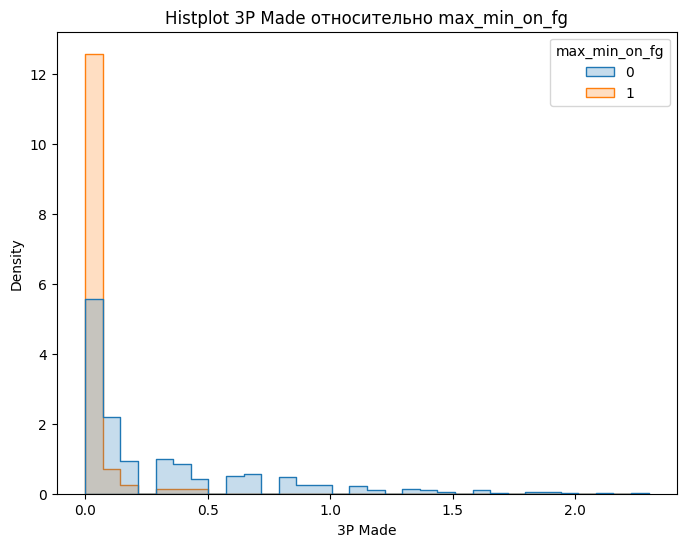

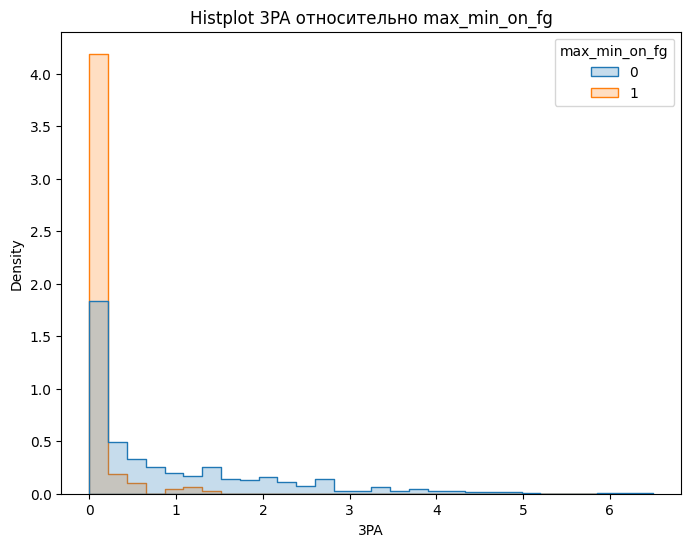

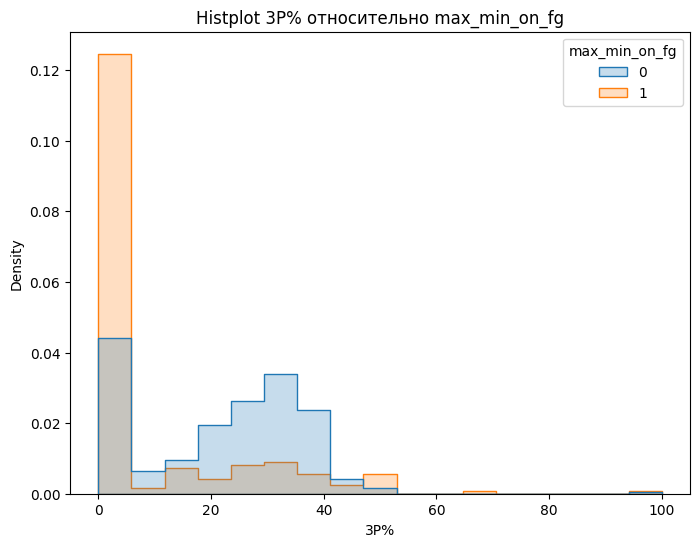

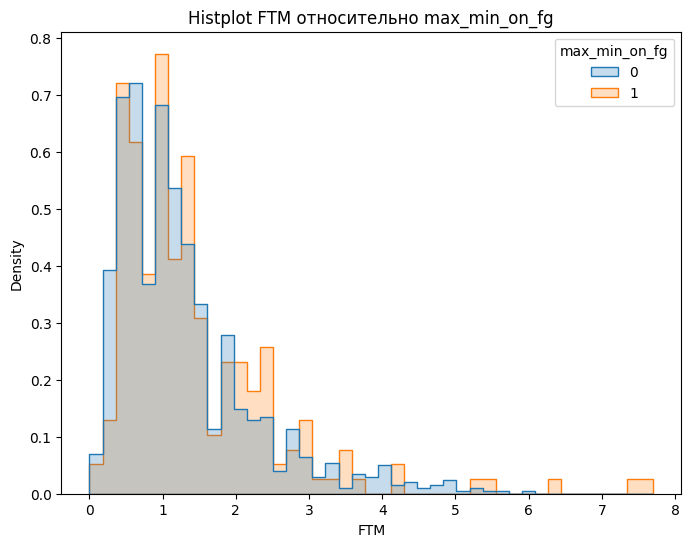

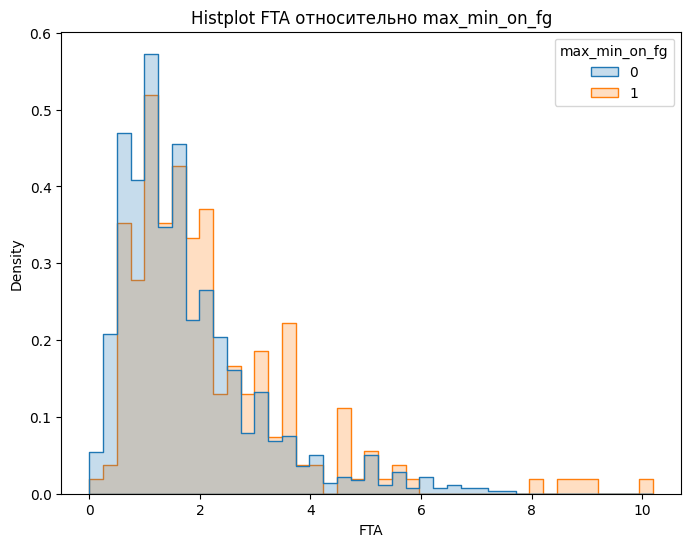

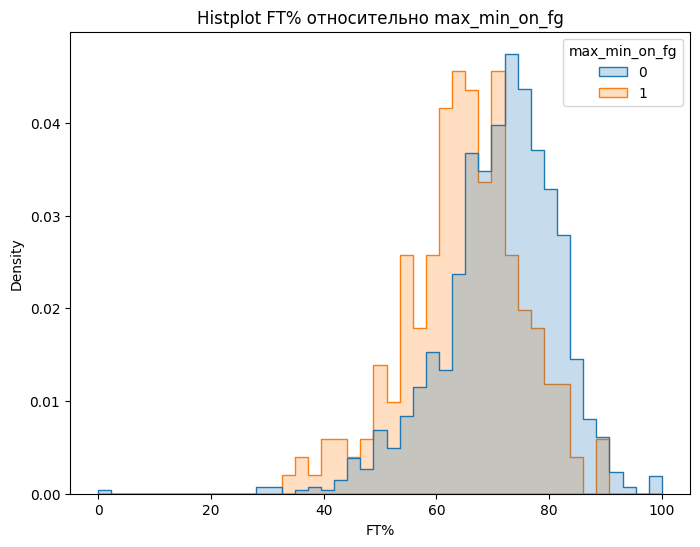

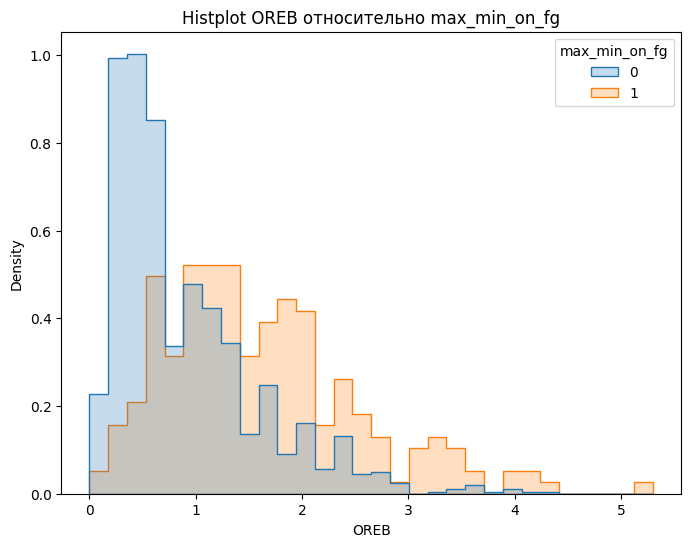

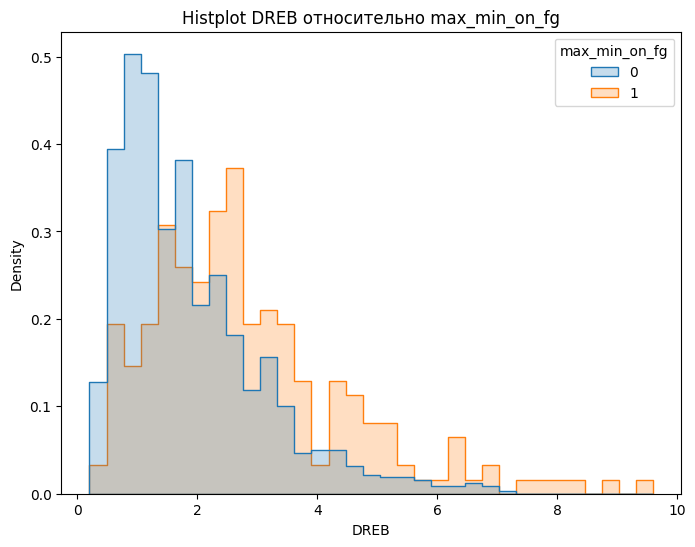

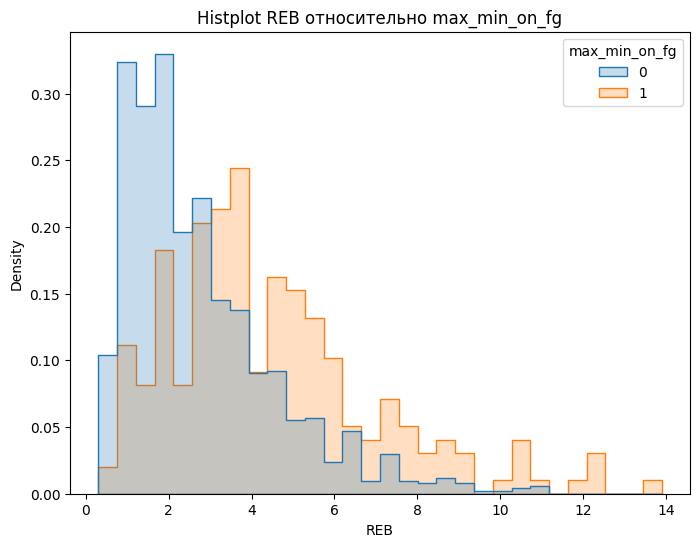

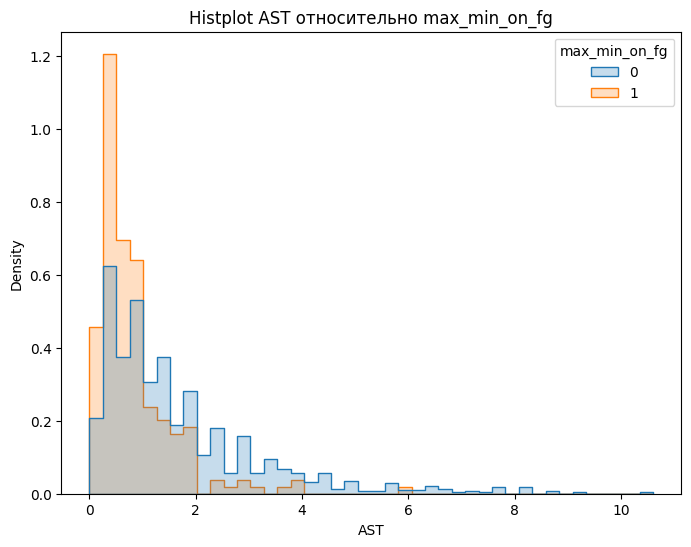

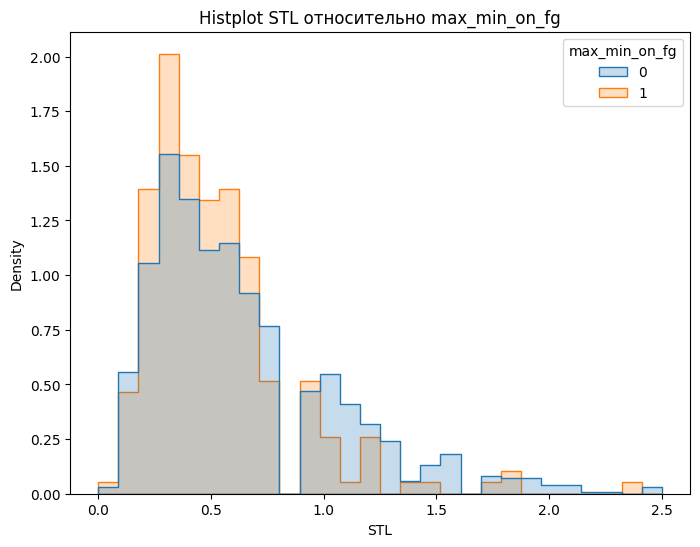

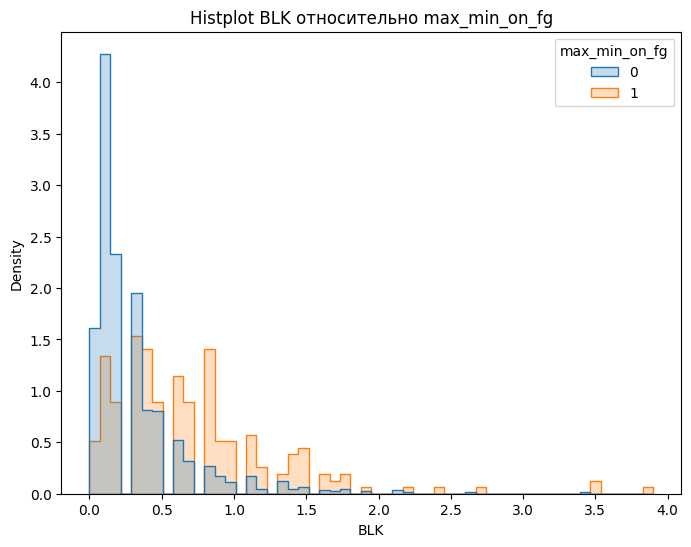

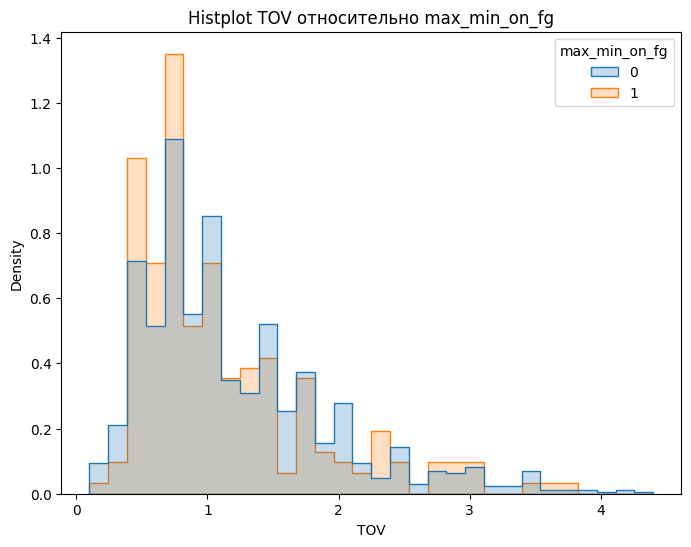

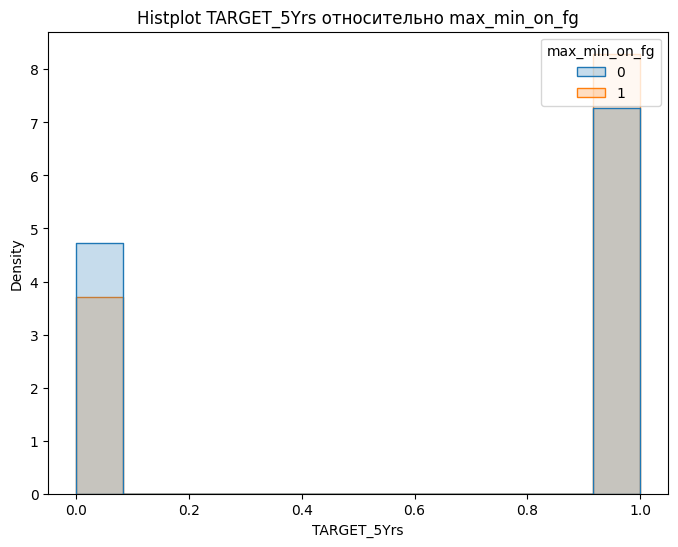

In [ ]:
for col in numeric_cols:
  plt.figure(figsize=(8,6))
  sns.histplot(data=df, x=col, hue="max_min_on_fg", element="step", stat="density", common_norm=False)
  plt.title(f"Histplot {col} относительно max_min_on_fg")
  plt.show()

**BOXPLOT**

*   Игроков, у которых процентное соотношение между результативными бросками и всеми кинутыми мячами больше 50, то есть (1) меньше сыгранных игр (GP), Отсюда и меньше минут проведенных на поле (MIN). У этих двух графиков медианные значения находятся примерно на одно значение, есть большой разброс.
*   Игроки с значение (1) Реализуют мало трёхочковых бросков из-за дуги, не забивают и даже не стараются кинуть. Хотя процент попаданий в разы больше.
*   Зато подборов ( DRB и ORB ) у игроков со значеним (1) больше. И блокшотов (blok) тоже больше.
*   Остальные значение примерно равные



**HISTPLOT**


*   На Hisplot'e видно, что игроки со значением (1) делают больше ассистов (AST - результативных передач) и также делают больше результативных перехватов мячей (STL)
*   А вот с блокшотами все не однозачно, какие-то игроки вообще их не совершают, а какие-то в огромных количествах. Связано с тем, что в таблице игроки разных позиций, поэтому так и получается.



In [ ]:
desc_stats_numeric = df.groupby('max_min_on_fg')[df.select_dtypes(include=[np.number]).columns].describe()

In [ ]:
desc_stats_categorical = df.groupby('max_min_on_fg')[df.select_dtypes(include=['object']).columns].describe()

# **Описание полученных результатов**

In [ ]:
for col in numeric_cols:
  print(f"Описательная статистика для {col}: \n")
  print(df.groupby("max_min_on_fg")[col].describe())
  print("\n" + "="*50 + "\n")

Описательная статистика для GP: 

                count       mean        std   min   25%   50%   75%   max
max_min_on_fg                                                            
0              1123.0  59.837934  17.669084  11.0  46.0  62.0  77.0  82.0
1               217.0  63.396313  15.868954  11.0  52.0  65.0  78.0  82.0


Описательная статистика для MIN: 

                count       mean       std  min   25%   50%   75%   max
max_min_on_fg                                                          
0              1123.0  17.606857  8.442533  3.1  10.6  16.1  23.1  40.9
1               217.0  17.716590  7.590973  5.1  11.9  16.6  21.5  38.3


Описательная статистика для PTS: 

                count      mean       std  min  25%  50%  75%   max
max_min_on_fg                                                      
0              1123.0  6.730988  4.308010  0.7  3.6  5.5  8.8  23.5
1               217.0  7.166359  4.598502  1.0  4.1  6.1  8.5  28.2


Описательная статистика для FGM: 


In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Name                           
              count unique            top freq
max_min_on_fg                                 
0              1123   1088  Charles Smith    9
1               217    211  Charles Jones    3

# **GP**
*   **Среднее значение сыгранных игр** у игроков с процентом реализованных бросков < 50% (max_min_on_fg = 0) равно примерно 59.83, что меньше, что у игроков, у которых больше 50% (max_min_on_fg = 1), у них примерно 63.39. Что говорит о том, что игроки, которые реализуют больше половины своих бросков отыгрывают больше игр
*   **Разброс(std)** у игроков (max_min_on_fg = 0) равно 17.669, а у (max_min_on_fg = 1) равно 15.86, что говорит о том, что игроки с (max_min_on_fg = 0) отыгрывают все же чутка больше игр, но это только из-за того, что их в целом больше.
*   **Минимальные и максимальные значение** одинаковые (11 и 82), что указвыает на схожие диапазоны сыгранных игр между игроками



# **MIN**
**Среднее проведенное время в игре** у игроков с процентом реализованных бросков < 50% (max_min_on_fg = 0) равно примерно 17.606, что немного меньше, что у игроков, у которых больше 50% (max_min_on_fg = 1) примерно равно 17.71. Что говорит о том, что игроки, которые реализуют больше половины своих бросков, отыгрывают на поле немного больше минут/секунд.
*   Стандартное отклонение меньше у игроков, которые реализуют больше 50% (max_min_on_fg = 1), меньше чем у игроков (max_min_on_fg = 0), говорит о том, что (max_min_on_fg = 1) отыгрывают поменьше минут на поле

# **PTS**
* Среднее количество набранных очков за игру примерно одинаковое (6.73 и 7.16), но у ЛУЧШИХ игроков немного больше, говорит о том, что они в среднем набирают больше очков за игру.
* Стандартное отклонение примерно одинакое (4.30 и 4.59) низкая разница по очкам в играх, ну так же из-за количества игроков.

# **FGM**
* Количество бросков, попавших в корзину, примерно одинако (6.73 и 7.16), говорит о том, что в среднем реализация бросков в 2-х очковой зоне одинаковое у всех игрок, но ЛУЧШИЕ игроки все равно набирают больше
* Стандартное отклонение примерно равное (1.65 и 1.78), говорит о низкой вариативности законченных бросков в 2-х очковой зоне

# **FGA**
* Количество совершенных и завершенных бросков с 2-х очковой зоны в среднем у игроков (max_min_on_fg = 0) равно примерно 5.98, это больше чем у (max_min_on_fg = 1), у них примерно 5.35, говорит о том, что ЛУЧШИЕ игроки промахиваются меньше.
* Среднее отклонение (3.61 и 3.419) наблюдается низкая вариативность завершенных и совершенных бросков

# **3P Made**
* Количество результативных трёхочковых бросков в среднем у (max_min_on_fg = 0) равно примерно 0.913, чем у (max_min_on_fg = 1), у них примерно 0.019, говорит о том, что ЛУЧШИЕ игроки меньше завершают броски с 3-х очковой зоны
* Среденее отклонение (0.4 и 0.07) говорит о большой разнице в концовке мячей из 3-х очковой зоны

# **3PA**
* Количество всех бросков с 3-х очковой зоны у игроков (max_min_on_fg = 0) примерно равно 0.913, а у (max_min_on_fg = 1) примерно равно 0.084, говорит о том, что ЛУЧШИЕ игроки в разы меньше совершают броски с 3-х очковой зоны
* Большой разрыв между максимальными значениями у игроков (6.5 и 1.3) говорит о том большом выбросе ХУДШИХ игроков по отношению к ЛУЧШИМ

# **3P%**
* Процентное соотношение 3-х очковых у (max_min_on_fg = 0) равно примерно 21.31%, а у (max_min_on_fg = 1) примерно 8.59%. Видна большая разница в процентном соотношение реализации бросков
* В максимальном значение есть 100% у обоих игроков. Есть супер меткие ребята, или просто те, которые совершили 1 бросок и его закончили.

# **FTM**
* Количество результативных штрафных бросков у (max_min_on_fg = 0) примерно равно 1.27, а у (max_min_on_fg = 1) равно 1.42, говорит о том, что ЛУЧШИЕ игроки, немного лучше попадают с штрафной зоны.
* Стандартное отклонение не велико, что говорит о стабильности игроков в штрафной зоне.

# **FTA**
* Общее количество штрафных бросков у (max_min_on_fg = 0) 1.75, а у (max_min_on_fg = 1) 2.17, говорит о том, что ЛУЧШИЕ игроки совершают больше бросков со штрафной зоны.
* Видно большые максимальные и минимальные выбросы, говоря о том, что за игру ЛУЧШИЕ игроки совершают больше штрафных очков, чем ХУДШИИ

# **FT%**
* Соотношение забитых штрафных мячей у (max_min_on_fg = 0) примерно 71.31%, а у (max_min_on_fg = 1) примерно 64.99, говорит о том, что ЛУЧШИЕ игроки поподают штрафным мячом меньше
* Стандартное отклонение почти одынаково, говорит о том, что реализация мячей в одном диапазоне

# **OREB**
* Подборы под корзиной соперника у (max_min_on_fg = 0) 0.89, а у (max_min_on_fg = 1) 1.61. Говорит о том, что ЛУЧШИЕ игроки совершают больше подборов под кольцом соперника
* Стандартное отклонение равно (0.688 и 0.917), у ЛУЧШИХ игроков больше вариативность в подборах под вражеским кольцом

# **DREB**
* Подборы под своим кольцом у (max_min_on_fg = 0) равно 1.86, а у (max_min_on_fg = 1) равно 2.84, что также говорит о том, что ЛУЧШИЕ игроки совершают больше подборов.
* Максимальные и минималные значения имеют достаточно сильный разброс, У ЛУЧШИХ он больше.

# **REB**
* Общее кол-во подборов у (max_min_on_fg = 0) равно 2.75, а у (max_min_on_fg = 1) равно 4.4, говорит о том, что у ЛУЧШИХ игроков больше подборов

# **AST**
* Количество результативных передач у (max_min_on_fg = 0) равно 1.68, а у (max_min_on_fg = 1) равно 0.85, ЛУЧШИЕ игрокие дают меньге результативных передач
* Есть большое отклонение в максимальном значение, говорит о большом количестве передач у ХУДШИХ игроков

# **STL**
* Результативные перехваты мячей примерно одинаковые (0.63 и 0.52), одинаково воруют мяч
* Так же одинаковы максимальные и минимальные значения, говорящие о том, что перехватов совершают мало

# **BLK**
* Совершенных блокшотов у игроков (max_min_on_fg = 0) равно 0.304, а у (max_min_on_fg = 1) равно 0.702, говорит о том, что ЛУЧШИЕ игроки совершают больше блокшотов.

# **TOV**
* И НАКОНЕЦ количество потерянных мячей у (max_min_on_fg = 0) 1.207, а у (max_min_on_fg = 1) 1.123, что говорит о том, что у ЛУЧШИХ игроков меньше потерь мяча.

# **Вывод**
На основе представленных данных можно сделать выводы о ключевых статх, которые влияют на игру игрока. В частности:

* Лучшие игроки совершают больше подборов и блокшотов, что дает спасение к счётв
* Лучшие игроки меньше рескуют и потому совершают меньше бросков с 3-х очковой зоны
* Лучшие игроки отыгрывают больше матчей в сезоне и больше минут на поле.
* Лучшие игроки совершают больше атак с 2-х очковой зоны, но больше промахиваются с штрафной.

# **2. Расчет теста Пирсона**

**Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,max_min_on_fg
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038209,0.482123,...,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833,0.075220
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165997,0.791000,...,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805,0.004868
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.151072,0.896297,...,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981,0.036821
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.119493,0.848019,...,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594,0.060647
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.197160,0.826616,...,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660,-0.064970
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.330690,0.245776,...,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134,0.686437
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.589855,0.158472,...,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619,-0.261078
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.582337,0.173533,...,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110,-0.287568
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,...,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411,-0.289672
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.030320,1.000000,...,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841,0.057479


# **MIN и GP**
* Есть средняя положительная корреляция (0.59) между сыгранными играми и минутами проведенным на поле. Это говорит о том, что игроки, которые отыграли больше игр, находятся на поле больше времени.

# **3P% и OREB**
* Есть слабая отрицательная корреляция (-0.288) между процентом реализованных трёхочковых и подборов мяча под вражеским кольцом. Более высокий процент попаданий с трёхочковых уменьшает количество подборов не только у игрока, но и вообще в игре, что логично (Если ты забил мяч, то подбора не будет :) ).

# **DREB и FGM**
* Есть высокая положительная корреляция (0.703) между количество подборов под союзным кольцом и количество бросков, попавших в корзину, за исключением штрафной зоны. Чем больше подборов под союзным кольцом, тем больше у игрока бросков по вражескому кольцу ( в слюзное то не забили).

# **BLOCK и STL**

* Есть слабая положительная корреляция (0.133) между количеством блокшотов и удачных перехватов мячей, чем больше игрок украл мячей у соперника, тем меньше блокшотов игрок делает в игре. Также работает и в обратную сторону.

# **MIN и PTS**
* Высокая корреляция (0.91), между количество отыгранных минут на поле и заработанных очков игру, чем больше минут на поле проводит игрок, тем больше очков он наберет за игру.




# **3. Немного машинного обучения**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Name', 'GP', 'TARGET_5Yrs']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [112]:
X_processed = X.copy()
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)
X_processed

,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,...,GP_74,GP_75,GP_76,GP_77,GP_78,GP_79,GP_80,GP_81,GP_82,TARGET_5Yrs_1
0,27.4,7.4,2.6,7.6,0.5,2.1,25.0,1.6,2.3,69.9,...,False,False,False,False,False,False,False,False,False,False
1,26.9,7.2,2.0,6.7,0.7,2.8,23.5,2.6,3.4,76.5,...,False,False,False,False,False,False,False,False,False,False
2,15.3,5.2,2.0,4.7,0.4,1.7,24.4,0.9,1.3,67.0,...,True,False,False,False,False,False,False,False,False,False
3,11.6,5.7,2.3,5.5,0.1,0.5,22.6,0.9,1.3,68.9,...,False,False,False,False,False,False,False,False,False,True
4,11.5,4.5,1.6,3.0,0.0,0.1,0.0,1.3,1.9,67.4,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,15.8,4.3,1.6,3.6,0.0,0.2,14.3,1.2,1.5,79.2,...,False,False,False,False,False,False,True,False,False,False
1336,12.6,3.9,1.5,4.1,0.1,0.7,16.7,0.8,1.0,79.4,...,False,False,False,False,False,False,False,False,False,True
1337,12.1,5.4,2.2,3.9,0.0,0.0,0.0,1.0,1.6,64.3,...,False,False,False,False,False,False,False,False,False,False
1338,12.0,4.5,1.7,3.8,0.0,0.2,10.0,1.2,1.8,62.5,...,False,False,False,False,False,False,False,False,False,True


In [113]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']


In [114]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [115]:
X_processed

,MIN,PTS,FGM,FGA,3P Made,3PA,3P%,FTM,FTA,FT%,...,GP_74,GP_75,GP_76,GP_77,GP_78,GP_79,GP_80,GP_81,GP_82,TARGET_5Yrs_1
0,0.642857,0.243636,0.232323,0.357895,0.217391,0.323077,0.250,0.207792,0.225490,0.699,...,False,False,False,False,False,False,False,False,False,False
1,0.629630,0.236364,0.171717,0.310526,0.304348,0.430769,0.235,0.337662,0.333333,0.765,...,False,False,False,False,False,False,False,False,False,False
2,0.322751,0.163636,0.171717,0.205263,0.173913,0.261538,0.244,0.116883,0.127451,0.670,...,True,False,False,False,False,False,False,False,False,False
3,0.224868,0.181818,0.202020,0.247368,0.043478,0.076923,0.226,0.116883,0.127451,0.689,...,False,False,False,False,False,False,False,False,False,True
4,0.222222,0.138182,0.131313,0.115789,0.000000,0.015385,0.000,0.168831,0.186275,0.674,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.335979,0.130909,0.131313,0.147368,0.000000,0.030769,0.143,0.155844,0.147059,0.792,...,False,False,False,False,False,False,True,False,False,False
1336,0.251323,0.116364,0.121212,0.173684,0.043478,0.107692,0.167,0.103896,0.098039,0.794,...,False,False,False,False,False,False,False,False,False,True
1337,0.238095,0.170909,0.191919,0.163158,0.000000,0.000000,0.000,0.129870,0.156863,0.643,...,False,False,False,False,False,False,False,False,False,False
1338,0.235450,0.138182,0.141414,0.157895,0.000000,0.030769,0.100,0.155844,0.176471,0.625,...,False,False,False,False,False,False,False,False,False,True


# **Функция для обучения и оценки модели**

In [116]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [126]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9067
Точность на тестовой выборке: 0.8582

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       225
           1       0.65      0.26      0.37        43

    accuracy                           0.86       268
   macro avg       0.76      0.61      0.64       268
weighted avg       0.84      0.86      0.83       268



In [127]:
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                   Feature  Coefficient
5                      3PA    -2.516666
3                      FGA    -2.486463
15                     BLK     2.348009
4                  3P Made    -2.070224
10                    OREB     1.937845
...                    ...          ...
466         Name_Gary Neal     0.000000
1163  Name_Stephen Jackson     0.000000
1162   Name_Stephen Howard     0.000000
137       Name_Brad Miller     0.000000
966      Name_Orien Greene     0.000000

[1380 rows x 2 columns]


# **4. Построение модели логистической регрессии для предсказания качества вина**

**4.1 Кросс-валидация модели**

In [129]:
# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")


Средняя точность при кросс-валидации: 0.8560
Отклонение точности: 0.0207


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

**4.2 Построение ROC-кривой**

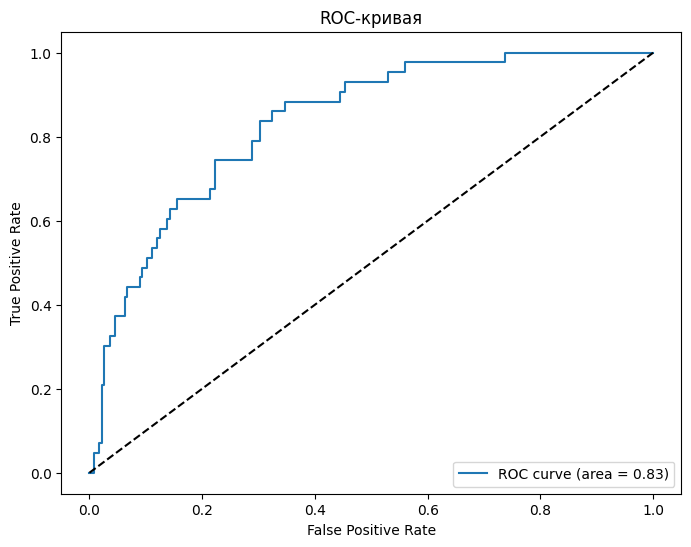

In [131]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()